<a href="https://colab.research.google.com/github/nandinisitlani2/Tensorflow-Essentials/blob/main/transfer_learning_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
import zipfile
zipref=zipfile.ZipFile("10_food_classes_10_percent.zip")
zipref.extractall()
zipref.close()

--2023-04-27 22:43:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 209.85.145.128, 209.85.146.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   187MB/s    in 0.9s    

2023-04-27 22:43:32 (187 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
ls 10_food_classes_10_percent/test

chicken_curry/  fried_rice/      hamburger/  pizza/  steak/
chicken_wings/  grilled_salmon/  ice_cream/  ramen/  sushi/


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SHAPE=(224,224)
BATCH_SIZE=32
Train_dir="10_food_classes_10_percent/train"
Test_dir="10_food_classes_10_percent/test"
train_datagen=ImageDataGenerator(rescale=1/225.)
test_datagen=ImageDataGenerator(rescale=1/225.)

train_data_10_percent=train_datagen.flow_from_directory(Train_dir,
                                                 target_size=IMAGE_SHAPE,
                                                 batch_size=BATCH_SIZE,
                                                 class_mode="categorical")

test_data_=test_datagen.flow_from_directory(Test_dir,
                                                 target_size=IMAGE_SHAPE,
                                                 batch_size=BATCH_SIZE,
                                                 class_mode="categorical")

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## setting up callbacks


In [ ]:
import tensorflow as tf
import datetime
def create_tensorboard_callback(dir_name,experiment_name):
  log_dir=dir_name + "/" + experiment_name +"/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tesorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  return tesorboard_callback


## Model using Tensdorflow Hub

In [ ]:
resnet_url="https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
efficient_net_url="https://tfhub.dev/google/efficientnet/b2/feature-vector/1"


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
def create_model(model_url,num_class=10):
  feature_extracter_layer=hub.KerasLayer(model_url,
                                    trainable=False,
                                    name="feature_extraction_layer",
                                    input_shape=IMAGE_SHAPE+(3,))
  
  model=tf.keras.Sequential([
      feature_extracter_layer,
      tf.keras.layers.Dense(10,activation="softmax")


  ])
  return model

In [ ]:
resnet_model=create_model(resnet_url)

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:

resnet_model.compile(loss="categorical_crossentropy",
                    optimizer="adam",
                    metrics=["accuracy"])

In [ ]:
resnet_history=resnet_model.fit(train_data_10_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_10_percent),
                                validation_data=test_data_,
                                validation_steps=len(test_data_),
                                callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                       experiment_name="resnet")]

                 )

Epoch 1/5
24/24 [==============================] - 26s 856ms/step - loss: 1.9129 - accuracy: 0.3667 - val_loss: 1.1680 - val_accuracy: 0.6440
Epoch 2/5
24/24 [==============================] - 19s 819ms/step - loss: 0.9045 - accuracy: 0.7147 - val_loss: 0.8401 - val_accuracy: 0.7340
Epoch 3/5
24/24 [==============================] - 18s 792ms/step - loss: 0.6146 - accuracy: 0.8373 - val_loss: 0.7633 - val_accuracy: 0.7568
Epoch 4/5
24/24 [==============================] - 19s 801ms/step - loss: 0.4737 - accuracy: 0.8853 - val_loss: 0.7091 - val_accuracy: 0.7720
Epoch 5/5
24/24 [==============================] - 18s 768ms/step - loss: 0.3830 - accuracy: 0.9187 - val_loss: 0.6746 - val_accuracy: 0.7864


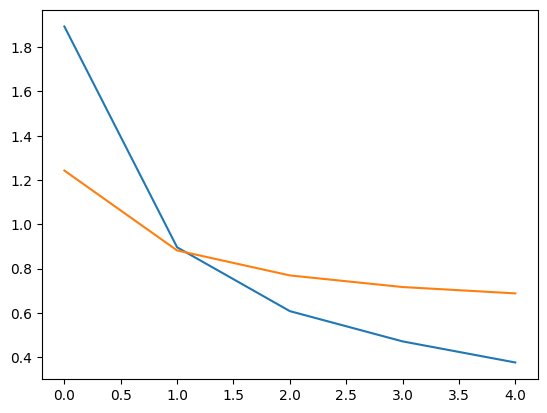

In [ ]:
import matplotlib.pyplot as plt
plt.plot(resnet_history.history["loss"])
plt.plot(resnet_history.history["val_loss"])

In [ ]:
eff_model=create_model(model_url=efficient_net_url)

In [ ]:
eff_model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])

In [ ]:
eff_history=eff_model.fit(train_data_10_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_10_percent),
                                validation_data=test_data_,
                                validation_steps=len(test_data_),
                                callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                       experiment_name="effnet")]

                 )

Epoch 1/5
24/24 [==============================] - 36s 914ms/step - loss: 1.8059 - accuracy: 0.4587 - val_loss: 1.2641 - val_accuracy: 0.7308
Epoch 2/5
24/24 [==============================] - 19s 826ms/step - loss: 1.0362 - accuracy: 0.7653 - val_loss: 0.8423 - val_accuracy: 0.8136
Epoch 3/5
24/24 [==============================] - 18s 779ms/step - loss: 0.7391 - accuracy: 0.8400 - val_loss: 0.6812 - val_accuracy: 0.8380
Epoch 4/5
24/24 [==============================] - 18s 791ms/step - loss: 0.5921 - accuracy: 0.8707 - val_loss: 0.6019 - val_accuracy: 0.8444
Epoch 5/5
24/24 [==============================] - 25s 1s/step - loss: 0.5033 - accuracy: 0.8880 - val_loss: 0.5515 - val_accuracy: 0.8540


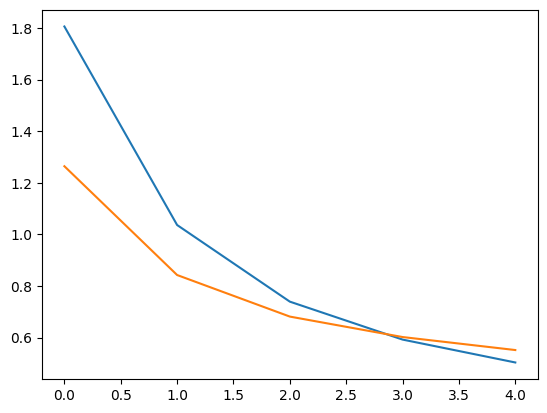

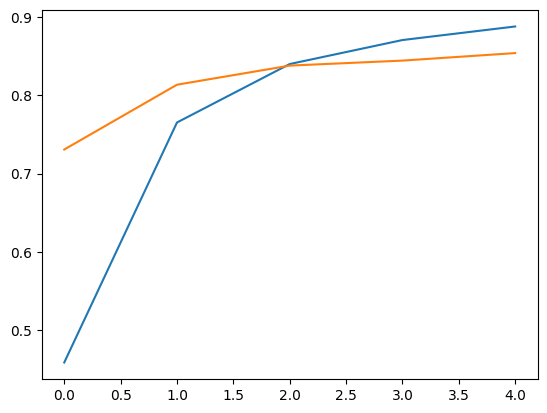

In [ ]:
import matplotlib.pyplot as plt
plt.plot(eff_history.history["loss"])
plt.plot(eff_history.history["val_loss"])

plt.figure()
plt.plot(eff_history.history["accuracy"])
plt.plot(eff_history.history["val_accuracy"])

In [ ]:
eff_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1408)             7768562   
 erasLayer)                                                      
                                                                 
 dense (Dense)               (None, 10)                14090     
                                                                 
Total params: 7,782,652
Trainable params: 14,090
Non-trainable params: 7,768,562
_________________________________________________________________


## Comparing results on tensorBoard

In [ ]:
!tensorboard dev upload --logdir ./tensorflow_hub/ \
--name "effnet vs resnet"
--one_shot

2023-04-27 23:07:53.437744: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Upload started and will continue reading any new data as it's added to the logdir.

To stop uploading, press Ctrl-C.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/qMdCDwiKRjOdwQx58TmBrQ/

[2023-04-27T23:07:55] Started scanning logdir.
[2023-04-27T23:07:57] Total uploaded: 60 scalars, 0 tensors, 2 binary objects (3.6 MB)


Interrupted. View your TensorBoard at https://tensorboard.dev/experiment/qMdCDwiKRjOdwQx58TmBrQ/
Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/main.py", line 46, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 308, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.10/di

NameError: ignored

In [ ]:
! tensorboard dev list

2023-04-27 23:19:46.557361: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://tensorboard.dev/experiment/qMdCDwiKRjOdwQx58TmBrQ/
	Name                 effnet vs resnet
	Description          [No Description]
	Id                   qMdCDwiKRjOdwQx58TmBrQ
	Created              2023-04-27 23:07:55 (11 minutes ago)
	Updated              2023-04-27 23:07:57 (11 minutes ago)
	Runs                 4
	Tags                 5
	Scalars              60
	Tensor bytes         0
	Binary object bytes  3737185
https://tensorboard.dev/experiment/Z72Bg2aCRQmxmfvQ2bzRgw/
	Name                 effnet vs resnet
	Description          [No Description]
	Id                   Z72Bg2aCRQmxmfvQ2bzRgw
	Created              2023-04-27 23:04:11 (15 minutes ago)
	Updated              2023-04-27 23:04:13 (15 minutes ago)
	Runs                 4
	Tags                 5
	Scalars              60
	Tensor bytes         0
	Binary object bytes  3737185
Total: 2 experiment(s)